In [721]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Taking all inputs of the scenarios in a dictionary as dataframes

## Luni

In [756]:
dfs = {}

# Loop through the scenes and create dataframes
for i in range(1, 4):  # Loop from 1 to 3
    sheet_name = f'scene{i}'
    df_name = f'df_s{i}'
    dfs[df_name] = pd.read_excel(r'D:\new_ballu/luni.xlsx', sheet_name=sheet_name) #Put the specific location, where the file is saved

In [757]:
# Define an empty list to store scenario names
scenarios = []

# Loop through and append scenario names
for i in range(3, 0, -1):  # Loop from 3 to 1 in reverse order
    scenarios.append(f's{i}')

# Initialize empty dictionaries to store the results
precip_avg = {}
pet_avg = {}
aet_avg = {}
sw_avg = {}
sq_avg = {}

# Loop through the scenarios
for scenario in scenarios:
    df = dfs[f'df_{scenario}']
    
    precip_avg[f'precip_avg_{scenario}'] = df.groupby('YEAR')['PRECIPmm'].mean()
    pet_avg[f'pet_avg_{scenario}'] = df.groupby('YEAR')['PETmm'].mean()
    aet_avg[f'aet_avg_{scenario}'] = df.groupby('YEAR')['ETmm'].mean()
    sw_avg[f'sw_avg_{scenario}'] = df.groupby('YEAR')['SWmm'].mean()
    sq_avg[f'sq_avg_{scenario}'] = df.groupby('YEAR')['SURQmm'].mean()

In [758]:
# Initialize an empty dictionary to store the dataframes
df1_dict = {}

# Loop through the scenarios
for scenario in scenarios:
    precip = precip_avg[f'precip_avg_{scenario}']
    pet = pet_avg[f'pet_avg_{scenario}']
    aet = aet_avg[f'aet_avg_{scenario}']
    sw = sw_avg[f'sw_avg_{scenario}']
    sq = sq_avg[f'sq_avg_{scenario}']
    
    df1_dict[f'df1_{scenario}'] = pd.concat([precip, pet, aet, sq, sw], axis=1)

In [759]:
df3_dict = df1_dict
# df3_dict

# 20 years window for Budyko with step of 10

In [659]:
#Input the ranges based on our temporal requirement (e.g, 30years, 20 years ....)
Years_20 = pd.DataFrame(['1961-1980','1971-1990','1981-2000','1991-2010','2001-2020']) #for 20 years window

In [660]:
# Create function called process_scenario which takes the input DataFrame (df1) and the scenario name as arguments
def process_scenario(df1, scenario_name):
    # Initialize an empty list to store the sums
    sums = []

    # Define the step size for selecting rows
    step = 10                # Input the step as the Years we want to go next (1951-1970,1961-1980.... so 10 for 1961 to 1951)

    # Loop through the rows with a step size of 10
    for i in range(0, len(df1), step):
        start = i
        end = i + 20         # Increase the end date by the period interval (20 for 1951-1970..)
        subset = df1.iloc[start:end]
        row_sum = subset.sum()
        sums.append(row_sum)

    # Create the new DataFrame df2
    df2 = pd.DataFrame(sums)

    # Reset the index for df2
    df2 = df2.iloc[:len(Years_20)].reset_index(drop=True)
    df2 = pd.concat([df2, Years_20], axis=1)
    df2 = df2.rename(columns={0: 'Years_20'})

    # Get the list of column names
    columns = df2.columns.tolist()

    # Move the last column to the first position
    columns = [columns[-1]] + columns[:-1]

    # Reorder the DataFrame with the new column order
    df2 = df2[columns]

    return df2

# Initialize an empty dictionary to store df2 DataFrames
df2_dict = {}

# Define an empty list to store scenario names
scenarios = []

# Loop through and append scenario names
for i in range(3, 0, -1):  # Loop from 3 to 1 in reverse order
    scenarios.append(f's{i}')

# Loop through scenarios and process each one
for scenario in scenarios:
    df1_scenario = df1_dict[f'df1_{scenario}']
    df2_scenario = process_scenario(df1_scenario, scenario)
    df2_dict[f'df2_{scenario}'] = df2_scenario

Calculate the indices

In [661]:
# Loop through scenarios
for scenario in scenarios:
    # Calculate EI and AI for each scenario
    df2 = df2_dict[f'df2_{scenario}']
    df2[f'EI'] = df2['ETmm'] / df2['PRECIPmm']
    df2[f'AI'] = df2['PETmm'] / df2['PRECIPmm']
    df2[f'Storage_Change'] = df2['SWmm'].diff()
    df2['Storage_Change'] = df2['Storage_Change'].fillna(0)

In [662]:
df2_dict['df2_s3']

,Years_20,PRECIPmm,PETmm,ETmm,SURQmm,SWmm,EI,AI,Storage_Change
0,1961-1980,652.216419,2714.416774,516.977379,100.091307,1247.739968,0.792647,4.161834,0.000000
1,1971-1990,582.666445,2738.489686,481.266371,84.304309,1062.014351,0.825972,4.699927,-185.725617
2,1981-2000,477.083154,2783.043990,450.164179,51.879889,971.991953,0.943576,5.833457,-90.022398
3,1991-2010,502.233142,2827.194481,459.359026,62.452559,1031.916028,0.914633,5.629247,59.924075
4,2001-2020,538.533128,2856.226961,475.913672,70.487163,992.125719,0.883722,5.303716,-39.790309


In [663]:
df20y_dict = df2_dict

In [664]:
len_df2_dict = len(df2_dict['df2_s2'])
ts_for_plot = np.arange(1, len_df2_dict+1)
ts_for_plot

array([1, 2, 3, 4, 5])

C:\Users\Satish\AppData\Local\Temp\ipykernel_7980\1932311020.py:36: RuntimeWarning: divide by zero encountered in divide
  y3 = vector(np.tanh(1/x3))


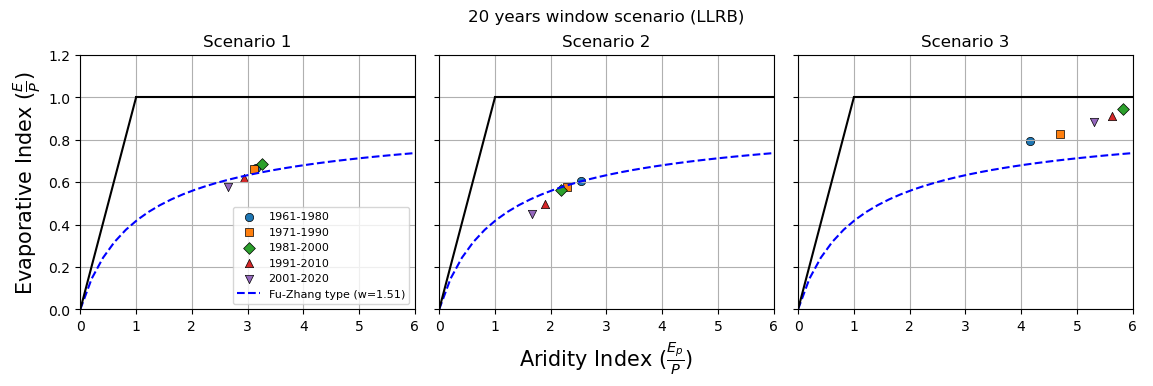

In [668]:
# %matplotlib notebook

# Define a list of scenarios
scenarios = [df2_dict['df2_s1'], df2_dict['df2_s2'], df2_dict['df2_s3']] 
#[df1_s1, df1_s2, df1_s3, df1_s4, df1_s5, df1_s6, df1_s7, df1_s8, df1_s9]

t = ['1961-1980','1971-1990','1981-2000','1991-2010','2001-2020']

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4.5), sharey=True, sharex=True)
plt.subplots_adjust(hspace=0.23, wspace=0.1)

# Define markers for each time period
markers = ['o', 's', 'D', '^', 'v']

for i, scenario in enumerate(scenarios):
    row = 0
    col = i
    
    for j, (ai, ei) in enumerate(zip(scenario['AI'], scenario['EI'])):
        marker = markers[j % len(markers)]  # Cycle through markers for each scenario
        axes[col].scatter(ai, ei, marker=marker, label=t[j], edgecolor='black', linewidth=0.5)
    
    # Add your Budyko framework curves and limits here
    #Energy Limit
    x = np.linspace(0,1)
    y = x

    #Water Limit
    x1 = np.linspace(1,10)
    y1 = 0*x1 + 1

    #Budyko (1951 or 1974) Equation
    vector = np.vectorize(np.float_)
    x3 = np.linspace(0,10)
    y3 = vector(np.tanh(1/x3))
    sc = 1-(np.exp(-1*x3))
    z3 = pow((x3*y3*sc),0.5)

    #Fu-Zhang type Budyko (1981 & 2004) Equation
    om = 1.51 #catchment specific parameter (omega)
    # vector = np.vectorize(np.float_)
    # x2 = np.linspace(0,8)
    y2 = 1 + x3 - pow((1+pow(x3,om)),(1/om))

    #Yang type Budyko
    n = 1.4 #parameter
    #For non-humid regions, n = (1-om)/om
    y4 = x3/pow((1+pow(x3,n)),(1/n))
    
    #Plotting
    # axes[col].plot(x3, y4, 'g--')
    axes[col].plot(x3, y2, 'b--')
    # axes[col].plot(x3, z3, 'r--')
    axes[col].plot(x, y, 'k')
    axes[col].plot(x1, y1, 'k')
    axes[col].grid()
    
    # Set axis limits and labels
    axes[col].axis([0, 6, 0, 1.2])
    axes[col].set_title(f'Scenario {i+1}')

    # Add colorbar only for the first subplot
    if i == 0:
        axes[col].legend(['1961-1980','1971-1990','1981-2000','1991-2010','2001-2020','Fu-Zhang type (w=1.51)'], 
                              loc='lower right', prop={'size': 8})
#         axes[col].set_xlabel(r'Aridity Index $(\frac{E_p}{P})$', fontsize=15)
#         axes[col].set_ylabel(r'Evaporative Index $(\frac{E}{P})$', fontsize=15)

# Set common x and y labels
fig.add_subplot(111, frame_on=False)
# plt.grid(False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'Aridity Index $(\frac{E_p}{P})$', fontsize=15)
plt.ylabel(r'Evaporative Index $(\frac{E}{P})$', fontsize=15)
plt.title('20 years window scenario (LLRB)', y = 1.1)

# # Add tight layout
plt.tight_layout()

# # Save the figure
plt.savefig(r'D:\new_ballu\submission2_phd1\submission3_phd1\supplementary_figs\all_basins_1_curve/LLRB_3scenarios_budyko_20years.jpeg', dpi=330)

# Show the plot
plt.show()

# 30 years window for Budyko with step of 10

In [669]:
#Input the ranges based on our temporal requirement (e.g, 30years, 20 years ....)
Years_30 = pd.DataFrame(['1961-1990','1971-2000','1981-2010','1991-2020']) #for 30 years window

In [670]:
# Create function called process_scenario which takes the input DataFrame (df1) and the scenario name as arguments
def process_scenario(df1, scenario_name):
    # Initialize an empty list to store the sums
    sums = []

    # Define the step size for selecting rows
    step = 10                # Input the step as the Years we want to go next (1951-1970,1961-1980.... so 10 for 1961 to 1951)

    # Loop through the rows with a step size of 10
    for i in range(0, len(df1), step):
        start = i
        end = i + 30         # Increase the end date by the period interval (30 for 1951-1980..)
        subset = df1.iloc[start:end]
        row_sum = subset.sum()
        sums.append(row_sum)

    # Create the new DataFrame df2
    df2 = pd.DataFrame(sums)

    # Reset the index for df2
    df2 = df2.iloc[:len(Years_30)].reset_index(drop=True)
    df2 = pd.concat([df2, Years_30], axis=1)
    df2 = df2.rename(columns={0: 'Years_30'})

    # Get the list of column names
    columns = df2.columns.tolist()

    # Move the last column to the first position
    columns = [columns[-1]] + columns[:-1]

    # Reorder the DataFrame with the new column order
    df2 = df2[columns]

    return df2

# Initialize an empty dictionary to store df2 DataFrames
df2_dict = {}

# Define an empty list to store scenario names
scenarios = []

# Loop through and append scenario names
for i in range(3, 0, -1):  # Loop from 3 to 1 in reverse order
    scenarios.append(f's{i}')

# Loop through scenarios and process each one
for scenario in scenarios:
    df1_scenario = df1_dict[f'df1_{scenario}']
    df2_scenario = process_scenario(df1_scenario, scenario)
    df2_dict[f'df2_{scenario}'] = df2_scenario

Calculate the indices

In [671]:
# Loop through scenarios
for scenario in scenarios:
    # Calculate EI and AI for each scenario
    df2 = df2_dict[f'df2_{scenario}']
    df2[f'EI'] = df2['ETmm'] / df2['PRECIPmm']
    df2[f'AI'] = df2['PETmm'] / df2['PRECIPmm']
    df2[f'Storage_Change'] = df2['SWmm'].diff()
    df2['Storage_Change'] = df2['Storage_Change'].fillna(0)

In [672]:
df2_dict['df2_s3']

,Years_30,PRECIPmm,PETmm,ETmm,SURQmm,SWmm,EI,AI,Storage_Change
0,1961-1990,881.416333,4109.071549,737.606384,123.491301,1699.635796,0.836842,4.661896,0.000000
1,1971-2000,830.549685,4126.878901,710.801545,112.784204,1582.110477,0.855821,4.968853,-117.525319
2,1981-2010,731.433056,4221.849256,679.988032,85.852553,1483.811856,0.929665,5.772024,-98.298621
3,1991-2020,786.416368,4244.616176,705.448846,98.967058,1512.221845,0.897042,5.397416,28.409989


In [673]:
df30y_dict = df2_dict

In [674]:
len_df2_dict = len(df2_dict['df2_s2'])
ts_for_plot = np.arange(1, len_df2_dict+1)
ts_for_plot

array([1, 2, 3, 4])

C:\Users\Satish\AppData\Local\Temp\ipykernel_7980\2953395221.py:35: RuntimeWarning: divide by zero encountered in divide
  y3 = vector(np.tanh(1/x3))


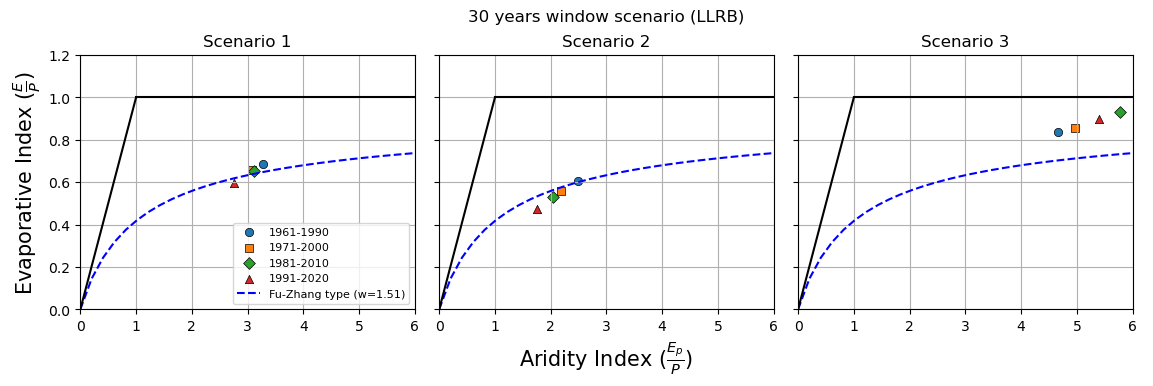

In [675]:
# %matplotlib notebook

# Define a list of scenarios
scenarios = [df2_dict['df2_s1'], df2_dict['df2_s2'], df2_dict['df2_s3']] 

t = ['1961-1990','1971-2000','1981-2010','1991-2020']

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4.5), sharey=True, sharex=True)
plt.subplots_adjust(hspace=0.23, wspace=0.1)

# Define markers for each time period
markers = ['o', 's', 'D', '^']

for i, scenario in enumerate(scenarios):
    row = 0
    col = i
    
    for ai, ei, period in zip(scenario['AI'], scenario['EI'], t):
        marker = markers[t.index(period) % len(markers)]  # Cycle through markers for each scenario
        axes[col].scatter(ai, ei, marker=marker, label=period, edgecolor='black', linewidth=0.5)
    
    # Add your Budyko framework curves and limits here
    #Energy Limit
    x = np.linspace(0,1)
    y = x

    #Water Limit
    x1 = np.linspace(1,10)
    y1 = 0*x1 + 1

    #Budyko (1951 or 1974) Equation
    vector = np.vectorize(np.float_)
    x3 = np.linspace(0,10)
    y3 = vector(np.tanh(1/x3))
    sc = 1-(np.exp(-1*x3))
    z3 = pow((x3*y3*sc),0.5)

    #Fu-Zhang type Budyko (1981 & 2004) Equation
    om = 1.51 #catchment specific parameter (omega)
    # vector = np.vectorize(np.float_)
    # x2 = np.linspace(0,8)
    y2 = 1 + x3 - pow((1+pow(x3,om)),(1/om))

    #Yang type Budyko
    n = 1.4 #parameter
    #For non-humid regions, n = (1-om)/om
    y4 = x3/pow((1+pow(x3,n)),(1/n))
    
    #Plotting
    # axes[col].plot(x3, y4, 'g--')
    axes[col].plot(x3, y2, 'b--')
    # axes[col].plot(x3, z3, 'r--')
    axes[col].plot(x, y, 'k')
    axes[col].plot(x1, y1, 'k')
    axes[col].grid()
    
    # Set axis limits and labels
    axes[col].axis([0, 6, 0, 1.2])
    axes[col].set_title(f'Scenario {i+1}')

    # Add colorbar only for the first subplot
    if i == 0:
        axes[col].legend(['1961-1990','1971-2000','1981-2010','1991-2020','Fu-Zhang type (w=1.51)'], 
                              loc='lower right', prop={'size': 8})

# Set common x and y labels
fig.add_subplot(111, frame_on=False)
# plt.grid(False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'Aridity Index $(\frac{E_p}{P})$', fontsize=15)
plt.ylabel(r'Evaporative Index $(\frac{E}{P})$', fontsize=15)
plt.title('30 years window scenario (LLRB)', y = 1.1)

# # Add tight layout
plt.tight_layout()

# # Save the figure
# plt.savefig('budyko_framework_LUNI_plots_scenarios_20years.png', dpi=330, bbox_inches='tight', pad_inches=0.1)
plt.savefig(r'D:\new_ballu\submission2_phd1\submission3_phd1\supplementary_figs\all_basins_1_curve/LLRB_3scenarios_budyko_30years.jpeg', dpi=330)

# Show the plot
plt.show()

# 10 years window for Budyko with step of 10

In [726]:
#Input the ranges based on our temporal requirement (e.g, 30years, 20 years ....)
Years_10 = pd.DataFrame(['1961-1970','1971-1980','1981-1990','1991-2000','2001-2010','2011-2020']) #for 10 years window

In [727]:
# Create function called process_scenario which takes the input DataFrame (df1) and the scenario name as arguments
def process_scenario(df1, scenario_name):
    # Initialize an empty list to store the sums
    sums = []

    # Define the step size for selecting rows
    step = 10                # Input the step as the Years we want to go next (1951-1970,1961-1980.... so 10 for 1961 to 1951)

    # Loop through the rows with a step size of 10
    for i in range(0, len(df1), step):
        start = i
        end = i + 10         # Increase the end date by the period interval (10 for 1951-1960..)
        subset = df1.iloc[start:end]
        row_sum = subset.sum()
        sums.append(row_sum)

    # Create the new DataFrame df2
    df2 = pd.DataFrame(sums)

    # Reset the index for df2
    df2 = df2.iloc[:len(Years_10)].reset_index(drop=True)
    df2 = pd.concat([df2, Years_10], axis=1)
    df2 = df2.rename(columns={0: 'Years_10'})

    # Get the list of column names
    columns = df2.columns.tolist()

    # Move the last column to the first position
    columns = [columns[-1]] + columns[:-1]

    # Reorder the DataFrame with the new column order
    df2 = df2[columns]

    return df2

# Initialize an empty dictionary to store df2 DataFrames
df2_dict = {}

# Define an empty list to store scenario names
scenarios = []

# Loop through and append scenario names
for i in range(3, 0, -1):  # Loop from 3 to 1 in reverse order
    scenarios.append(f's{i}')

# Loop through scenarios and process each one
for scenario in scenarios:
    df1_scenario = df1_dict[f'df1_{scenario}']
    df2_scenario = process_scenario(df1_scenario, scenario)
    df2_dict[f'df2_{scenario}'] = df2_scenario

Calculate the indices

In [728]:
# Loop through scenarios
for scenario in scenarios:
    # Calculate EI and AI for each scenario
    df2 = df2_dict[f'df2_{scenario}']
    df2[f'EI'] = df2['ETmm'] / df2['PRECIPmm']
    df2[f'AI'] = df2['PETmm'] / df2['PRECIPmm']
    df2[f'Storage_Change'] = df2['SWmm'].diff()
    df2['Storage_Change'] = df2['Storage_Change'].fillna(0)

In [729]:
df2_dict['df2_s3']

,Years_10,PRECIPmm,PETmm,ETmm,SURQmm,SWmm,EI,AI,Storage_Change
0,1961-1970,2990.3,18843.977069,2555.476724,194.307448,471.905241,0.854589,6.301701,0.000000
1,1971-1980,3076.2,19075.964207,2546.055034,317.691207,448.146690,0.827662,6.201146,-23.758552
2,1981-1990,2219.1,19475.171448,2041.902034,123.767690,287.308483,0.920149,8.776158,-160.838207
3,1991-2000,2165.1,19472.756103,1974.560448,117.848897,259.462310,0.911995,8.993929,-27.846172
4,2001-2010,2219.2,19785.497931,1933.294897,162.832310,293.055586,0.871167,8.915599,33.593276
5,2011-2020,2052.0,19944.414690,1902.224931,93.755483,251.842241,0.927010,9.719500,-41.213345


In [730]:
df10y_dict = df2_dict

In [731]:
len_df2_dict = len(df2_dict['df2_s2'])
ts_for_plot = np.arange(1, len_df2_dict+1)
ts_for_plot

array([1, 2, 3, 4, 5, 6])

C:\Users\Satish\AppData\Local\Temp\ipykernel_7980\166341482.py:35: RuntimeWarning: divide by zero encountered in divide
  y3 = vector(np.tanh(1/x3))


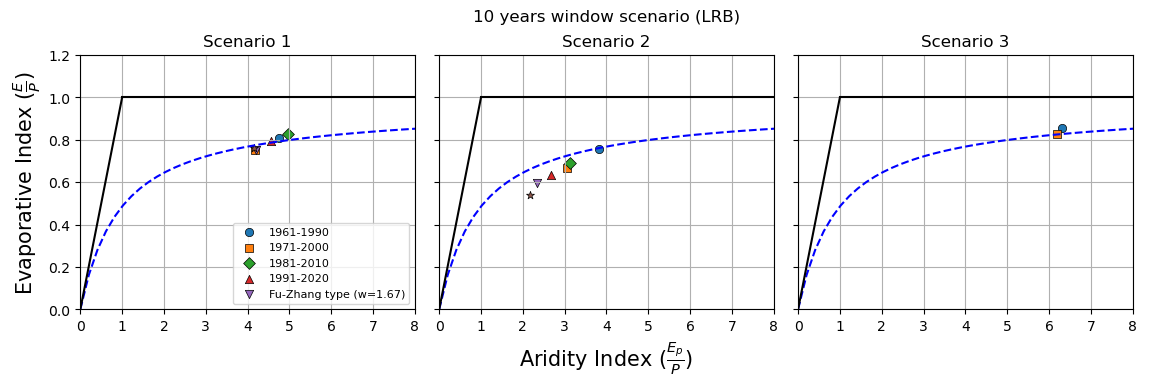

In [732]:
# %matplotlib notebook

# Define a list of scenarios
scenarios = [df2_dict['df2_s1'], df2_dict['df2_s2'], df2_dict['df2_s3']] 

t = ['1961-1970','1971-1980','1981-1990','1991-2000','2001-2010','2011-2020']

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4.5), sharey=True, sharex=True)
plt.subplots_adjust(hspace=0.23, wspace=0.1)

# Define markers for each time period
markers = ['o', 's', 'D', '^', 'v', '*']

for i, scenario in enumerate(scenarios):
    row = 0
    col = i
    
    for ai, ei, period in zip(scenario['AI'], scenario['EI'], t):
        marker = markers[t.index(period) % len(markers)]  # Cycle through markers for each scenario
        axes[col].scatter(ai, ei, marker=marker, label=period, edgecolor='black', linewidth=0.5)
    
    # Add your Budyko framework curves and limits here
    #Energy Limit
    x = np.linspace(0,1)
    y = x

    #Water Limit
    x1 = np.linspace(1,10)
    y1 = 0*x1 + 1

    #Budyko (1951 or 1974) Equation
    vector = np.vectorize(np.float_)
    x3 = np.linspace(0,10)
    y3 = vector(np.tanh(1/x3))
    sc = 1-(np.exp(-1*x3))
    z3 = pow((x3*y3*sc),0.5)

    #Fu-Zhang type Budyko (1981 & 2004) Equation
    om = 1.67 #catchment specific parameter (omega)
    # vector = np.vectorize(np.float_)
    # x2 = np.linspace(0,8)
    y2 = 1 + x3 - pow((1+pow(x3,om)),(1/om))

    #Yang type Budyko
    n = 1.4 #parameter
    #For non-humid regions, n = (1-om)/om
    y4 = x3/pow((1+pow(x3,n)),(1/n))
    
    #Plotting
    # axes[col].plot(x3, y4, 'g--')
    axes[col].plot(x3, y2, 'b--')
    # axes[col].plot(x3, z3, 'r--')
    axes[col].plot(x, y, 'k')
    axes[col].plot(x1, y1, 'k')
    axes[col].grid()
    
    # Set axis limits and labels
    axes[col].axis([0, 8, 0, 1.2])
    axes[col].set_title(f'Scenario {i+1}')

    # Add colorbar only for the first subplot
    if i == 0:
        axes[col].legend(['1961-1990','1971-2000','1981-2010','1991-2020','Fu-Zhang type (w=1.67)'], 
                              loc='lower right', prop={'size': 8})

# Set common x and y labels
fig.add_subplot(111, frame_on=False)
# plt.grid(False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'Aridity Index $(\frac{E_p}{P})$', fontsize=15)
plt.ylabel(r'Evaporative Index $(\frac{E}{P})$', fontsize=15)
plt.title('10 years window scenario (LRB)', y = 1.1)

# # Add tight layout
plt.tight_layout()

# # Save the figure
plt.savefig(r'D:\new_ballu\submission2_phd1\submission3_phd1\supplementary_figs\all_basins_1_curve/LRB_3scenarios_budyko_10years.jpeg', dpi=330)

# Show the plot
plt.show()

# 5 years window for Budyko with step of 5

In [733]:
#Input the ranges based on our temporal requirement (e.g, 30years, 20 years ....)
Years_5 = pd.DataFrame(['1961-1965','1966-1970','1971-1975','1976-1980','1981-1985','1986-1990','1991-1995',
                        '1996-2000','2001-2005','2006-2010','2011-2015','2016-2020']) #for 5 years window

In [734]:
# Create function called process_scenario which takes the input DataFrame (df1) and the scenario name as arguments
def process_scenario(df1, scenario_name):
    # Initialize an empty list to store the sums
    sums = []

    # Define the step size for selecting rows
    step = 5                # Input the step as the Years we want to go next (1951-1970,1961-1980.... so 10 for 1961 to 1951)

    # Loop through the rows with a step size of 10
    for i in range(0, len(df1), step):
        start = i
        end = i + 5         # Increase the end date by the period interval (30 for 1951-1980..)
        subset = df1.iloc[start:end]
        row_sum = subset.sum()
        sums.append(row_sum)

    # Create the new DataFrame df2
    df2 = pd.DataFrame(sums)

    # Reset the index for df2
    df2 = df2.iloc[:len(Years_5)].reset_index(drop=True)
    df2 = pd.concat([df2, Years_5], axis=1)
    df2 = df2.rename(columns={0: 'Years_5'})

    # Get the list of column names
    columns = df2.columns.tolist()

    # Move the last column to the first position
    columns = [columns[-1]] + columns[:-1]

    # Reorder the DataFrame with the new column order
    df2 = df2[columns]

    return df2

# Initialize an empty dictionary to store df2 DataFrames
df2_dict = {}

# Define an empty list to store scenario names
scenarios = []

# Loop through and append scenario names
for i in range(3, 0, -1):  # Loop from 3 to 1 in reverse order
    scenarios.append(f's{i}')

# Loop through scenarios and process each one
for scenario in scenarios:
    df1_scenario = df1_dict[f'df1_{scenario}']
    df2_scenario = process_scenario(df1_scenario, scenario)
    df2_dict[f'df2_{scenario}'] = df2_scenario

Calculate the indices

In [735]:
# Loop through scenarios
for scenario in scenarios:
    # Calculate EI and AI for each scenario
    df2 = df2_dict[f'df2_{scenario}']
    df2[f'EI'] = df2['ETmm'] / df2['PRECIPmm']
    df2[f'AI'] = df2['PETmm'] / df2['PRECIPmm']
    df2[f'Storage_Change'] = df2['SWmm'].diff()
    df2['Storage_Change'] = df2['Storage_Change'].fillna(0)

In [736]:
df2_dict['df2_s3']

,Years_5,PRECIPmm,PETmm,ETmm,SURQmm,SWmm,EI,AI,Storage_Change
0,1961-1965,1429.5,9360.515207,1294.768690,67.315483,208.365966,0.905749,6.548104,0.000000
1,1966-1970,1560.8,9483.461862,1260.708034,126.991966,263.539276,0.807732,6.076026,55.173310
2,1971-1975,1434.7,9668.444138,1199.203172,137.663552,204.087310,0.835856,6.739001,-59.451966
3,1976-1980,1641.5,9407.520069,1346.851862,180.027655,244.059379,0.820501,5.731051,39.972069
4,1981-1985,1182.1,9665.037483,1096.609586,62.655207,144.172414,0.927679,8.176159,-99.886966
5,1986-1990,1037.0,9810.133966,945.292448,61.112483,143.136069,0.911565,9.460110,-1.036345
6,1991-1995,1244.3,9616.436276,1083.376828,84.585586,171.333207,0.870672,7.728390,28.197138
7,1996-2000,920.8,9856.319828,891.183621,33.263310,88.129103,0.967836,10.704083,-83.204103
8,2001-2005,1116.0,9858.841241,943.692552,79.771483,154.945793,0.845603,8.834087,66.816690
9,2006-2010,1103.2,9926.656690,989.602345,83.060828,138.109793,0.897029,8.998057,-16.836000


In [737]:
df5y_dict = df2_dict

In [738]:
len_df2_dict = len(df2_dict['df2_s2'])
ts_for_plot = np.arange(1, len_df2_dict+1)
ts_for_plot

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

C:\Users\Satish\AppData\Local\Temp\ipykernel_7980\3485258814.py:35: RuntimeWarning: divide by zero encountered in divide
  y3 = vector(np.tanh(1/x3))
C:\Users\Satish\AppData\Local\Temp\ipykernel_7980\3485258814.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


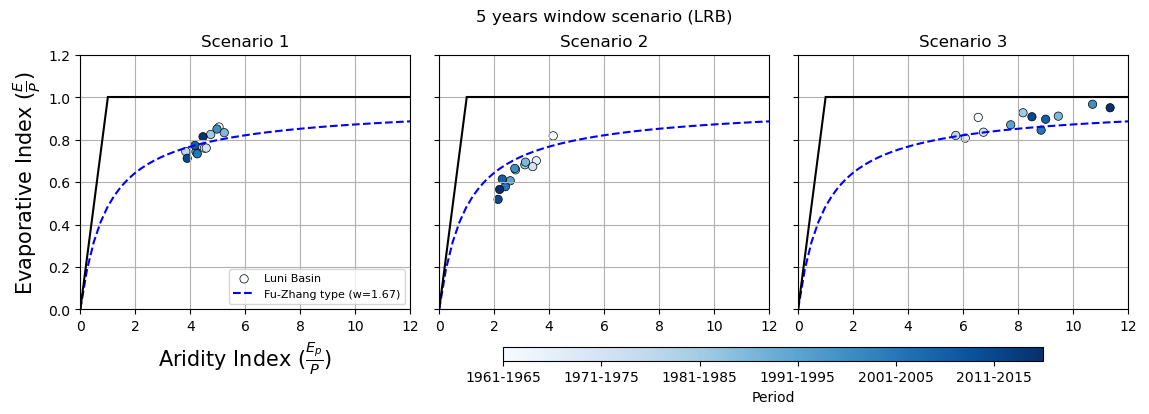

In [739]:
# %matplotlib notebook

# Define a list of scenarios
scenarios = [df2_dict['df2_s1'], df2_dict['df2_s2'], df2_dict['df2_s3']] 
#[df1_s1, df1_s2, df1_s3, df1_s4, df1_s5, df1_s6, df1_s7, df1_s8, df1_s9]

t = ['1961-1965','1966-1970','1971-1975','1976-1980','1981-1985','1986-1990','1991-1995',
                        '1996-2000','2001-2005','2006-2010','2011-2015','2016-2020']

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4.5), sharey=True, sharex=True)
plt.subplots_adjust(hspace=0.23, wspace=0.1)

for i, scenario in enumerate(scenarios):
    row = 0
    col = i
    
    # Scatter plot
    colors = list(range(1, len_df2_dict+1)) #Number of rows 
    scatter = axes[col].scatter(scenario['AI'], scenario['EI'], c=colors, cmap='Blues', edgecolor='black', linewidth=0.5)
#     axes[col].set_title(f'Scenario {i+1})
    
    # Add your Budyko framework curves and limits here
    #Energy Limit
    x = np.linspace(0,1)
    y = x

    #Water Limit
    x1 = np.linspace(1,12)
    y1 = 0*x1 + 1

    #Budyko (1951 or 1974) Equation
    vector = np.vectorize(np.float_)
    x3 = np.linspace(0,12)
    y3 = vector(np.tanh(1/x3))
    sc = 1-(np.exp(-1*x3))
    z3 = pow((x3*y3*sc),0.5)

    #Fu-Zhang type Budyko (1981 & 2004) Equation
    om = 1.67 #catchment specific parameter (omega)
    # vector = np.vectorize(np.float_)
    # x2 = np.linspace(0,8)
    y2 = 1 + x3 - pow((1+pow(x3,om)),(1/om))

    # #Yang type Budyko
    # n = 1.2 #parameter
    # #For non-humid regions, n = (1-om)/om
    # y4 = x3/pow((1+pow(x3,n)),(1/n))
    
    #Plotting
    # axes[col].plot(x3, y4, 'g--')
    axes[col].plot(x3, y2, 'b--')
    # axes[col].plot(x3, z3, 'r--')
    axes[col].plot(x, y, 'k')
    axes[col].plot(x1, y1, 'k')
    axes[col].grid()
    
    # Set axis limits and labels
    axes[col].axis([0, 12, 0, 1.2])
    axes[col].set_title(f'Scenario {i+1}')

    # Add colorbar only for the first subplot
    if i == 0:
        axes[col].legend(['Luni Basin','Fu-Zhang type (w=1.67)'], loc='lower right', prop={'size': 8})
        axes[col].set_xlabel(r'Aridity Index $(\frac{E_p}{P})$', fontsize=15)
        axes[col].set_ylabel(r'Evaporative Index $(\frac{E}{P})$', fontsize=15)
        
# cbar = fig.colorbar(scatter, ax = axes[0,1], orientation='horizontal')    
# cbar.set_label('Time (years)')

# Set common x and y labels
fig.add_subplot(111, frame_on=False)
# plt.grid(False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# plt.xlabel(r'Aridity Index $(\frac{E_p}{P})$', fontsize=15)
# plt.ylabel(r'Evaporative Index $(\frac{E}{P})$', fontsize=15)
plt.title('5 years window scenario (LRB)', y = 1.1)

cbar_ax = fig.add_axes([0.45, 0.12, 0.45, 0.03])
# cbar_ax = fig.add_axes([0.45, -0.07, 0.4, 0.05])
cbar = plt.colorbar(scatter, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Period')

# Set custom tick positions and labels on the colorbar
tick_positions = [1, 3, 5, 7, 9, 11]  # Replace with your desired tick positions
tick_labels = ['1961-1965', '1971-1975', '1981-1985', '1991-1995', '2001-2005', '2011-2015']  # Replace with your desired tick labels

cbar.set_ticks(tick_positions)
cbar.set_ticklabels(tick_labels)

# Add tight layout
plt.tight_layout()

# Save the figure
plt.savefig(r'D:\new_ballu\submission2_phd1\submission3_phd1\supplementary_figs\all_basins_1_curve/LRB_3scenarios_budyko_5years.jpeg', dpi=330)

# Show the plot
plt.show()

# 3 years window for Budyko with step of 3

In [740]:
#Input the ranges based on our temporal requirement (e.g, 30years, 20 years ....)
Years_3 = pd.DataFrame(['1961-1963','1964-1966','1967-1969','1970-1972','1973-1975','1976-1978','1979-1981',
                        '1982-1984','1985-1987','1988-1990','1991-1993','1994-1996','1997-1999','2000-2002',
                        '2003-2005','2006-2008','2009-2011','2012-2014','2015-2017','2018-2020']) #for 3 years window

In [741]:
# Create function called process_scenario which takes the input DataFrame (df1) and the scenario name as arguments
def process_scenario(df1, scenario_name):
    # Initialize an empty list to store the sums
    sums = []

    # Define the step size for selecting rows
    step = 3                # Input the step as the Years we want to go next (1951-1970,1961-1980.... so 10 for 1961 to 1951)

    # Loop through the rows with a step size of 10
    for i in range(0, len(df1), step):
        start = i
        end = i + 3         # Increase the end date by the period interval (30 for 1951-1980..)
        subset = df1.iloc[start:end]
        row_sum = subset.sum()
        sums.append(row_sum)

    # Create the new DataFrame df2
    df2 = pd.DataFrame(sums)

    # Reset the index for df2
    df2 = df2.iloc[:len(Years_3)].reset_index(drop=True)
    df2 = pd.concat([df2, Years_3], axis=1)
    df2 = df2.rename(columns={0: 'Years_3'})

    # Get the list of column names
    columns = df2.columns.tolist()

    # Move the last column to the first position
    columns = [columns[-1]] + columns[:-1]

    # Reorder the DataFrame with the new column order
    df2 = df2[columns]

    return df2

# Initialize an empty dictionary to store df2 DataFrames
df2_dict = {}

# Define an empty list to store scenario names
scenarios = []

# Loop through and append scenario names
for i in range(3, 0, -1):  # Loop from 3 to 1 in reverse order
    scenarios.append(f's{i}')

# Loop through scenarios and process each one
for scenario in scenarios:
    df1_scenario = df1_dict[f'df1_{scenario}']
    df2_scenario = process_scenario(df1_scenario, scenario)
    df2_dict[f'df2_{scenario}'] = df2_scenario

Calculate the indices

In [742]:
# Loop through scenarios
for scenario in scenarios:
    # Calculate EI and AI for each scenario
    df2 = df2_dict[f'df2_{scenario}']
    df2[f'EI'] = df2['ETmm'] / df2['PRECIPmm']
    df2[f'AI'] = df2['PETmm'] / df2['PRECIPmm']
    df2[f'Storage_Change'] = df2['SWmm'].diff()
    df2['Storage_Change'] = df2['Storage_Change'].fillna(0)

In [743]:
df2_dict['df2_s3']

,Years_3,PRECIPmm,PETmm,ETmm,SURQmm,SWmm,EI,AI,Storage_Change
0,1961-1963,989.9,5519.392655,868.545828,45.590414,149.797517,0.877408,5.575707,0.000000
1,1964-1966,794.0,5746.450621,697.640000,41.586655,110.893931,0.878640,7.237343,-38.903586
2,1967-1969,914.7,5696.116759,742.149931,95.551897,160.958310,0.811359,6.227306,50.064379
3,1970-1972,934.4,5759.916759,722.466345,89.109448,147.180000,0.773187,6.164294,-13.778310
4,1973-1975,792.0,5790.544414,723.877793,60.132586,107.162793,0.913987,7.311293,-40.017207
5,1976-1978,1029.4,5664.703552,823.122034,122.819069,154.749897,0.799613,5.502918,47.587103
6,1979-1981,817.3,5715.620379,732.329759,62.137759,112.366724,0.896035,6.993295,-42.383172
7,1982-1984,757.4,5827.479552,644.113345,53.004414,97.730034,0.850427,7.694058,-14.636690
8,1985-1987,639.9,5770.429690,621.428828,25.398483,82.542034,0.971134,9.017705,-15.188000
9,1988-1990,616.6,5904.458345,567.759931,40.435621,83.979172,0.920791,9.575833,1.437138


In [744]:
df3y_dict = df2_dict

In [745]:
len_df2_dict = len(df2_dict['df2_s2'])
ts_for_plot = np.arange(1, len_df2_dict+1)
ts_for_plot

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

C:\Users\Satish\AppData\Local\Temp\ipykernel_7980\2604796616.py:36: RuntimeWarning: divide by zero encountered in divide
  y3 = vector(np.tanh(1/x3))
C:\Users\Satish\AppData\Local\Temp\ipykernel_7980\2604796616.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


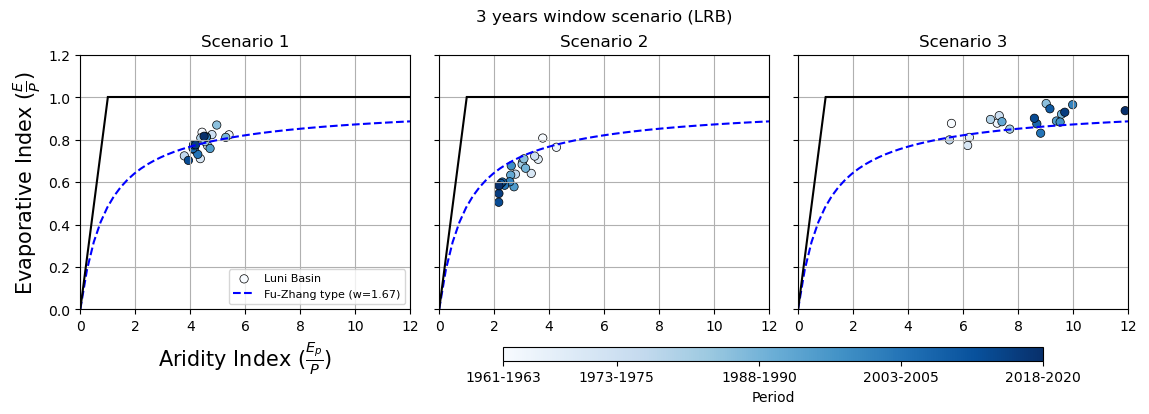

In [746]:
# %matplotlib notebook

# Define a list of scenarios
scenarios = [df2_dict['df2_s1'], df2_dict['df2_s2'], df2_dict['df2_s3']] 
#[df1_s1, df1_s2, df1_s3, df1_s4, df1_s5, df1_s6, df1_s7, df1_s8, df1_s9]

t = ['1961-1963','1964-1966','1967-1969','1970-1972','1973-1975','1976-1978','1979-1981',
        '1982-1984','1985-1987','1988-1990','1991-1993','1994-1996','1997-1999','2000-2002',
        '2003-2005','2006-2008','2009-2011','2012-2014','2015-2017','2018-2020']

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4.5), sharey=True, sharex=True)
plt.subplots_adjust(hspace=0.23, wspace=0.1)

for i, scenario in enumerate(scenarios):
    row = 0
    col = i
    
    # Scatter plot
    colors = list(range(1, len_df2_dict+1)) #Number of rows 
    scatter = axes[col].scatter(scenario['AI'], scenario['EI'], c=colors, cmap='Blues', edgecolor='black', linewidth=0.5)
#     axes[col].set_title(f'Scenario {i+1})
    
    # Add your Budyko framework curves and limits here
    #Energy Limit
    x = np.linspace(0,1)
    y = x

    #Water Limit
    x1 = np.linspace(1,12)
    y1 = 0*x1 + 1

    #Budyko (1951 or 1974) Equation
    vector = np.vectorize(np.float_)
    x3 = np.linspace(0,12)
    y3 = vector(np.tanh(1/x3))
    sc = 1-(np.exp(-1*x3))
    z3 = pow((x3*y3*sc),0.5)

    #Fu-Zhang type Budyko (1981 & 2004) Equation
    om = 1.67 #catchment specific parameter (omega)
    # vector = np.vectorize(np.float_)
    # x2 = np.linspace(0,8)
    y2 = 1 + x3 - pow((1+pow(x3,om)),(1/om))

    # #Yang type Budyko
    # n = 1.2 #parameter
    # #For non-humid regions, n = (1-om)/om
    # y4 = x3/pow((1+pow(x3,n)),(1/n))
    
    #Plotting
    # axes[col].plot(x3, y4, 'g--')
    axes[col].plot(x3, y2, 'b--')
    # axes[col].plot(x3, z3, 'r--')
    axes[col].plot(x, y, 'k')
    axes[col].plot(x1, y1, 'k')
    axes[col].grid()
    
    # Set axis limits and labels
    axes[col].axis([0, 12, 0, 1.2])
    axes[col].set_title(f'Scenario {i+1}')

    # Add colorbar only for the first subplot
    if i == 0:
#         cbar = fig.colorbar(scatter, ax=axes[col])
#         cbar.set_label('Time (years)')
#         axes[col].set_xlabel(r'$(\frac{E_p}{P})$', fontsize=15)
#         axes[col].set_ylabel(r'$(\frac{E}{P})$', fontsize=15)
        axes[col].legend(['Luni Basin','Fu-Zhang type (w=1.67)'], loc='lower right', prop={'size': 8})
        axes[col].set_xlabel(r'Aridity Index $(\frac{E_p}{P})$', fontsize=15)
        axes[col].set_ylabel(r'Evaporative Index $(\frac{E}{P})$', fontsize=15)

# Set common x and y labels
fig.add_subplot(111, frame_on=False)
# plt.grid(False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# plt.xlabel(r'Aridity Index $(\frac{E_p}{P})$', fontsize=15)
# plt.ylabel(r'Evaporative Index $(\frac{E}{P})$', fontsize=15)
plt.title('3 years window scenario (LRB)', y = 1.1)

cbar_ax = fig.add_axes([0.45, 0.12, 0.45, 0.03])
# cbar_ax = fig.add_axes([0.45, -0.07, 0.4, 0.05])
cbar = plt.colorbar(scatter, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Period')
# cbar_ax = fig.add_axes([0.93, 0.25, 0.015, 0.5])
# cbar = plt.colorbar(scatter, cax=cbar_ax, orientation='vertical')
# cbar.set_label('Time (years)')

# Set custom tick positions and labels on the colorbar
tick_positions = [1, 5, 10, 15, 20]  # Define fewer tick positions
tick_labels = ['1961-1963', '1973-1975', '1988-1990', '2003-2005', '2018-2020']  # Define corresponding tick labels

cbar.set_ticks(tick_positions)
cbar.set_ticklabels(tick_labels)

# Add tight layout
plt.tight_layout()

# Save the figure
plt.savefig(r'D:\new_ballu\submission2_phd1\submission3_phd1\supplementary_figs\all_basins_1_curve/LRB_3scenarios_budyko_3years.jpeg', dpi=330)

# Show the plot
plt.show()

# 2 years window for Budyko with step of 2

In [747]:
#Input the ranges based on our temporal requirement (e.g, 30years, 20 years ....)
Years_2 = pd.DataFrame(['1961-1962','1963-1964','1965-1966','1967-1968','1969-1970','1971-1972','1973-1974',
                        '1975-1976','1977-1978','1979-1980','1981-1982','1983-1984','1985-1986','1987-1988',
                        '1989-1990','1991-1992','1993-1994','1995-1996','1997-1998','1999-2000','2001-2002',
                        '2003-2004','2005-2006','2007-2008','2009-2010','2011-2012','2013-2014','2015-2016',
                        '2017-2018','2019-2020']) #for 2 years window

In [748]:
# Create function called process_scenario which takes the input DataFrame (df1) and the scenario name as arguments
def process_scenario(df1, scenario_name):
    # Initialize an empty list to store the sums
    sums = []

    # Define the step size for selecting rows
    step = 2                # Input the step as the Years we want to go next (1951-1970,1961-1980.... so 10 for 1961 to 1951)

    # Loop through the rows with a step size of 10
    for i in range(0, len(df1), step):
        start = i
        end = i + 2         # Increase the end date by the period interval (30 for 1951-1980..)
        subset = df1.iloc[start:end]
        row_sum = subset.sum()
        sums.append(row_sum)

    # Create the new DataFrame df2
    df2 = pd.DataFrame(sums)

    # Reset the index for df2
    df2 = df2.iloc[:len(Years_2)].reset_index(drop=True)
    df2 = pd.concat([df2, Years_2], axis=1)
    df2 = df2.rename(columns={0: 'Years_2'})

    # Get the list of column names
    columns = df2.columns.tolist()

    # Move the last column to the first position
    columns = [columns[-1]] + columns[:-1]

    # Reorder the DataFrame with the new column order
    df2 = df2[columns]

    return df2

# Initialize an empty dictionary to store df2 DataFrames
df2_dict = {}

# Define an empty list to store scenario names
scenarios = []

# Loop through and append scenario names
for i in range(3, 0, -1):  # Loop from 3 to 1 in reverse order
    scenarios.append(f's{i}')

# Loop through scenarios and process each one
for scenario in scenarios:
    df1_scenario = df1_dict[f'df1_{scenario}']
    df2_scenario = process_scenario(df1_scenario, scenario)
    df2_dict[f'df2_{scenario}'] = df2_scenario

Calculate the indices

In [749]:
# Loop through scenarios
for scenario in scenarios:
    # Calculate EI and AI for each scenario
    df2 = df2_dict[f'df2_{scenario}']
    df2[f'EI'] = df2['ETmm'] / df2['PRECIPmm']
    df2[f'AI'] = df2['PETmm'] / df2['PRECIPmm']
    df2[f'Storage_Change'] = df2['SWmm'].diff()
    df2['Storage_Change'] = df2['Storage_Change'].fillna(0)

In [750]:
df2_dict['df2_s3']

,Years_2,PRECIPmm,PETmm,ETmm,SURQmm,SWmm,EI,AI,Storage_Change
0,1961-1962,688.8,3648.550690,604.762759,32.555724,103.560241,0.877995,5.296967,0.000000
1,1963-1964,530.5,3733.334483,477.109862,25.364276,82.005966,0.899359,7.037388,-21.554276
2,1965-1966,564.6,3883.958103,484.313207,29.257069,75.125241,0.857799,6.879132,-6.880724
3,1967-1968,626.6,3769.274897,484.242690,67.286552,117.549552,0.772810,6.015440,42.424310
4,1969-1970,579.8,3808.858897,505.048207,39.843828,93.664241,0.871073,6.569263,-23.885310
5,1971-1972,642.7,3877.899724,475.325379,77.530966,96.924517,0.739576,6.033763,3.260276
6,1973-1974,474.3,3957.101828,446.576621,34.769690,64.770828,0.941549,8.343036,-32.153690
7,1975-1976,719.7,3691.786138,575.465379,85.994034,97.939241,0.799591,5.129618,33.168414
8,1977-1978,627.4,3806.360000,524.957828,62.187931,99.202621,0.836720,6.066879,1.263379
9,1979-1980,612.1,3742.816517,523.729828,57.208586,89.309483,0.855628,6.114714,-9.893138


In [751]:
df2y_dict = df2_dict

In [752]:
len_df2_dict = len(df2_dict['df2_s2'])
ts_for_plot = np.arange(1, len_df2_dict+1)
ts_for_plot

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

C:\Users\Satish\AppData\Local\Temp\ipykernel_7980\1786736262.py:37: RuntimeWarning: divide by zero encountered in divide
  y3 = vector(np.tanh(1/x3))
C:\Users\Satish\AppData\Local\Temp\ipykernel_7980\1786736262.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


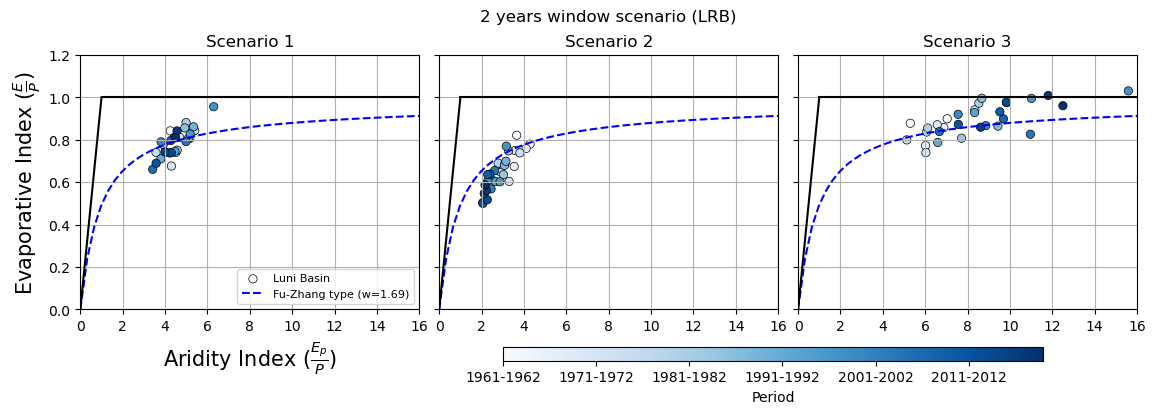

In [755]:
# %matplotlib notebook

# Define a list of scenarios
scenarios = [df2_dict['df2_s1'], df2_dict['df2_s2'], df2_dict['df2_s3']] 
#[df1_s1, df1_s2, df1_s3, df1_s4, df1_s5, df1_s6, df1_s7, df1_s8, df1_s9]

t = ['1961-1962','1963-1964','1965-1966','1967-1968','1969-1970','1971-1972','1973-1974','1975-1976','1977-1978',
     '1979-1980','1981-1982','1983-1984','1985-1986','1987-1988','1989-1990','1991-1992','1993-1994','1995-1996',
     '1997-1998','1999-2000','2001-2002','2003-2004','2005-2006','2007-2008','2009-2010','2011-2012','2013-2014',
     '2015-2016','2017-2018','2019-2020']

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4.5), sharey=True, sharex=True)
plt.subplots_adjust(hspace=0.23, wspace=0.1)

for i, scenario in enumerate(scenarios):
    row = 0
    col = i
    
    # Scatter plot
    colors = list(range(1, len_df2_dict+1)) #Number of rows 
    scatter = axes[col].scatter(scenario['AI'], scenario['EI'], c=colors, cmap='Blues', edgecolor='black', linewidth=0.5)
#     axes[col].set_title(f'Scenario {i+1})
    
    # Add your Budyko framework curves and limits here
    #Energy Limit
    x = np.linspace(0,1)
    y = x

    #Water Limit
    x1 = np.linspace(1,16)
    y1 = 0*x1 + 1

    #Budyko (1951 or 1974) Equation
    vector = np.vectorize(np.float_)
    x3 = np.linspace(0,16)
    y3 = vector(np.tanh(1/x3))
    sc = 1-(np.exp(-1*x3))
    z3 = pow((x3*y3*sc),0.5)

    #Fu-Zhang type Budyko (1981 & 2004) Equation
    om = 1.69 #catchment specific parameter (omega)
    # vector = np.vectorize(np.float_)
    # x2 = np.linspace(0,8)
    y2 = 1 + x3 - pow((1+pow(x3,om)),(1/om))

    # #Yang type Budyko
    # n = 1.2 #parameter
    # #For non-humid regions, n = (1-om)/om
    # y4 = x3/pow((1+pow(x3,n)),(1/n))
    
    #Plotting
    # axes[col].plot(x3, y4, 'g--')
    axes[col].plot(x3, y2, 'b--')
    # axes[col].plot(x3, z3, 'r--')
    axes[col].plot(x, y, 'k')
    axes[col].plot(x1, y1, 'k')
    axes[col].grid()
    
    # Set axis limits and labels
    axes[col].axis([0, 16, 0, 1.2])
    axes[col].set_title(f'Scenario {i+1}')

    # Add colorbar only for the first subplot
    if i == 0:
#         cbar = fig.colorbar(scatter, ax=axes[col])
#         cbar.set_label('Time (years)')
#         axes[col].set_xlabel(r'$(\frac{E_p}{P})$', fontsize=15)
#         axes[col].set_ylabel(r'$(\frac{E}{P})$', fontsize=15)
        axes[col].legend(['Luni Basin','Fu-Zhang type (w=1.69)'], loc='lower right', prop={'size': 8})
        axes[col].set_xlabel(r'Aridity Index $(\frac{E_p}{P})$', fontsize=15)
        axes[col].set_ylabel(r'Evaporative Index $(\frac{E}{P})$', fontsize=15)

# Set common x and y labels
fig.add_subplot(111, frame_on=False)
# plt.grid(False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# plt.xlabel(r'Aridity Index $(\frac{E_p}{P})$', fontsize=15)
# plt.ylabel(r'Evaporative Index $(\frac{E}{P})$', fontsize=15)
plt.title('2 years window scenario (LRB)', y = 1.1)

cbar_ax = fig.add_axes([0.45, 0.12, 0.45, 0.03])
# cbar_ax = fig.add_axes([0.45, -0.07, 0.4, 0.05])
cbar = plt.colorbar(scatter, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Period')
# cbar_ax = fig.add_axes([0.93, 0.25, 0.015, 0.5])
# cbar = plt.colorbar(scatter, cax=cbar_ax, orientation='vertical')
# cbar.set_label('Time (years)')

# Set custom tick positions and labels on the colorbar
tick_positions = [1, 6, 11, 16, 21, 26]  # Select every 5th tick position
tick_labels = ['1961-1962', '1971-1972', '1981-1982', '1991-1992', '2001-2002', '2011-2012']  # Corresponding labels

cbar.set_ticks(tick_positions)
cbar.set_ticklabels(tick_labels)

# Add tight layout
plt.tight_layout()

# Save the figure
plt.savefig(r'D:\new_ballu\submission2_phd1\submission3_phd1\supplementary_figs\all_basins_1_curve/LRB_3scenarios_budyko_2years.jpeg', dpi=330)

# Show the plot
plt.show()

# 1 year window for Budyko with step of 1

Before running below code directly, please run first 7-8 cells (before 20 yrs code), then run the below code

In [760]:
trend_p = +2
trend_n = -2
# Loop through scenarios
for scenario in scenarios:
    # Calculate EI and AI for each scenario
    df3 = df3_dict[f'df1_{scenario}']
    df3[f'EI'] = df3['ETmm'] / df3['PRECIPmm']
    df3[f'AI'] = df3['PETmm'] / df3['PRECIPmm']
    df3[f'Storage_Change'] = df3['SWmm'].diff()
    df3['Storage_Change'] = df3['Storage_Change'].fillna(0)
    df3['Storage_Change_P'] = df3['Storage_Change'] + trend_p * (df3.index - 1961)
    df3['Storage_Change_N'] = df3['Storage_Change'] + trend_n * (df3.index - 1961)

In [761]:
df3_dict['df1_s3'].head(70)

,PRECIPmm,PETmm,ETmm,SURQmm,SWmm,EI,AI,Storage_Change,Storage_Change_P,Storage_Change_N
YEAR,,,,,,,,,,
1961,361.8,1802.658207,308.179621,18.438552,54.623759,0.851796,4.982472,0.000000,0.000000,0.000000
1962,327.0,1845.892483,296.583138,14.117172,48.936483,0.906982,5.644931,-5.687276,-3.687276,-7.687276
1963,301.1,1870.841966,263.783069,13.034690,46.237276,0.876065,6.213358,-2.699207,1.300793,-6.699207
1964,229.4,1862.492517,213.326793,12.329586,35.768690,0.929934,8.118973,-10.468586,-4.468586,-16.468586
1965,210.2,1978.630034,212.896069,9.395483,22.799759,1.012826,9.413083,-12.968931,-4.968931,-20.968931
1966,354.4,1905.328069,271.417138,19.861586,52.325483,0.765850,5.376208,29.525724,39.525724,19.525724
1967,322.8,1929.706276,251.384793,32.814345,58.340207,0.778763,5.978024,6.014724,18.014724,-5.985276
1968,303.8,1839.568621,232.857897,34.472207,59.209345,0.766484,6.055196,0.869138,14.869138,-13.130862
1969,288.1,1926.841862,257.907241,28.265345,43.408759,0.895200,6.688101,-15.800586,0.199414,-31.800586


In [762]:
df1y_dict = df3_dict

In [763]:
time_s = [year for year in range(1961, 2021)]

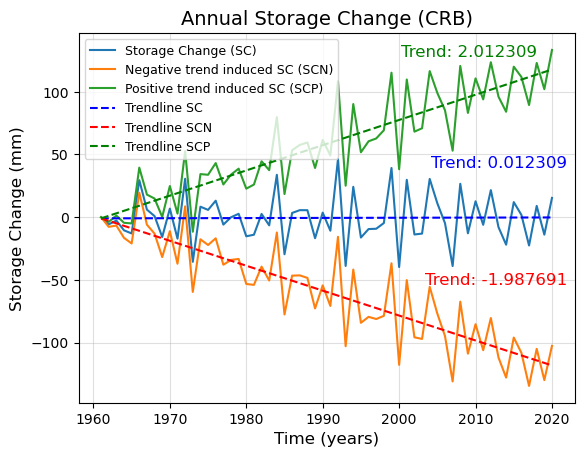

In [764]:
plt.plot(time_s, df1_dict['df1_s3'].Storage_Change, label='Storage Change (SC)')
plt.plot(time_s, df1_dict['df1_s3'].Storage_Change_N, label='Negative trend induced SC (SCN)')
plt.plot(time_s, df1_dict['df1_s3'].Storage_Change_P, label='Positive trend induced SC (SCP)')

# Fit and plot trendlines
trendline_linear_trend = np.polyfit(time_s, df1_dict['df1_s3'].Storage_Change, 1)
trendline_linear_trend1 = np.polyfit(time_s, df1_dict['df1_s3'].Storage_Change_N, 1)
trendline_linear_trend2 = np.polyfit(time_s, df1_dict['df1_s3'].Storage_Change_P, 1)

plt.plot(time_s, np.polyval(trendline_linear_trend, time_s), 'b--', label='Trendline SC')
plt.plot(time_s, np.polyval(trendline_linear_trend1, time_s), 'r--', label='Trendline SCN')
plt.plot(time_s, np.polyval(trendline_linear_trend2, time_s), 'g--', label='Trendline SCP')

plt.text(time_s[-1]+2, np.polyval(trendline_linear_trend, time_s[-1])+40, 
         f'Trend: {trendline_linear_trend[0]:.6f}', fontsize=12, color='b', ha = 'right')
plt.text(time_s[-1]+2, np.polyval(trendline_linear_trend1, time_s[-1])+64, 
         f'Trend: {trendline_linear_trend1[0]:.6f}', fontsize=12, color='r', ha = 'right')
plt.text(time_s[-1]-2, np.polyval(trendline_linear_trend2, time_s[-1])+10, 
         f'Trend: {trendline_linear_trend2[0]:.6f}', fontsize=12, color='g', ha = 'right')

plt.xlabel('Time (years)', fontsize = 12)
plt.ylabel('Storage Change (mm)', fontsize = 12)
plt.title('Annual Storage Change (CRB)', fontsize = 14)
plt.legend(fontsize=9)
plt.grid(alpha = 0.4)
# plt.savefig(r'D:\Balaram\collge_system\Research_study\Budyko\work for college\Appropriateness\Figures_for_first_draft\Hydroclimatology_Data/ann_storage_change_ts_trend_Cauvery_RB_1yr.jpeg', dpi=330)
plt.show()

In [765]:
at = trendline_linear_trend[0]
at

0.012309478686608349

C:\Users\Satish\AppData\Local\Temp\ipykernel_7980\363628823.py:29: RuntimeWarning: divide by zero encountered in divide
  y3 = vector(np.tanh(1/x3))
C:\Users\Satish\AppData\Local\Temp\ipykernel_7980\363628823.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


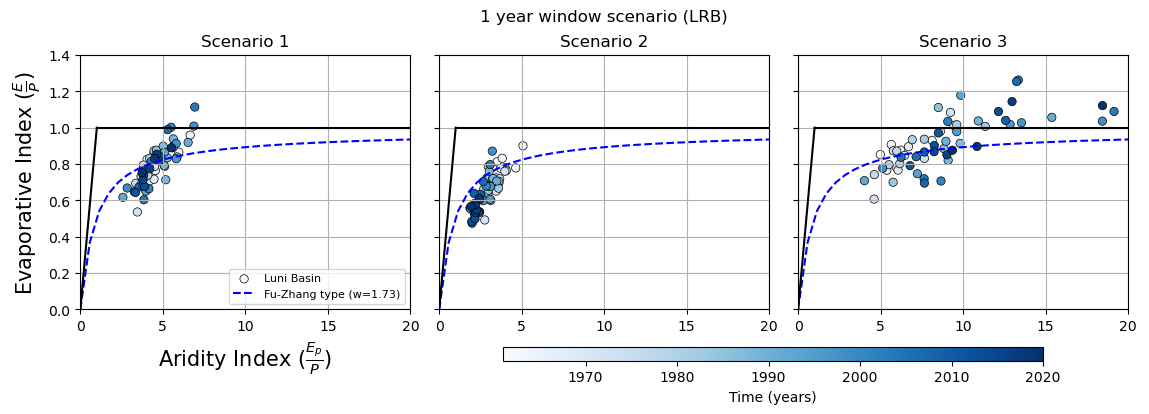

In [768]:
# %matplotlib notebook
# Define a list of scenarios
scenarios = [df1_dict['df1_s1'], df1_dict['df1_s2'], df1_dict['df1_s3']] 

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4.5), sharey=True, sharex=True)
plt.subplots_adjust(hspace=0.23, wspace=0.1)

for i, scenario in enumerate(scenarios):
    row = 0
    col = i
    
    # Scatter plot
    colors = list(range(1961, 2021))
    scatter = axes[col].scatter(scenario['AI'], scenario['EI'], c=colors, cmap='Blues', edgecolor='black', linewidth=0.5)
    
    # Add your Budyko framework curves and limits here
    #Energy Limit
    x = np.linspace(0,1)
    y = x

    #Water Limit
    x1 = np.linspace(1,28)
    y1 = 0*x1 + 1

    #Budyko (1951 or 1974) Equation
    vector = np.vectorize(np.float_)
    x3 = np.linspace(0,28)
    y3 = vector(np.tanh(1/x3))
    sc = 1-(np.exp(-1*x3))
    z3 = pow((x3*y3*sc),0.5)

    #Fu-Zhang type Budyko (1981 & 2004) Equation
    om = 1.73 #catchment specific parameter (omega)
    # vector = np.vectorize(np.float_)
    # x2 = np.linspace(0,8)
    y2 = 1 + x3 - pow((1+pow(x3,om)),(1/om))

    #Yang type Budyko
    n = 1.2 #parameter
    #For non-humid regions, n = (1-om)/om
    y4 = x3/pow((1+pow(x3,n)),(1/n))
    
    #Plotting
    # axes[col].plot(x3, y4, 'g--')
    axes[col].plot(x3, y2, 'b--')
    # axes[col].plot(x3, z3, 'r--')
    axes[col].plot(x, y, 'k')
    axes[col].plot(x1, y1, 'k')
    axes[col].grid()
    
    # Set axis limits and labels
    axes[col].axis([0, 20, 0, 1.4])
    axes[col].set_title(f'Scenario {i+1}')

    # Add colorbar only for the first subplot
    if i == 0:
#         cbar = fig.colorbar(scatter, ax=axes[col])
#         cbar.set_label('Time (years)')
#         axes[col].set_xlabel(r'$(\frac{E_p}{P})$', fontsize=15)
#         axes[col].set_ylabel(r'$(\frac{E}{P})$', fontsize=15)
        axes[col].legend(['Luni Basin','Fu-Zhang type (w=1.73)'], loc='lower right', prop={'size': 8})
        axes[col].set_xlabel(r'Aridity Index $(\frac{E_p}{P})$', fontsize=15)
        axes[col].set_ylabel(r'Evaporative Index $(\frac{E}{P})$', fontsize=15)
        
# cbar = fig.colorbar(scatter, ax = axes[0,1], orientation='horizontal')    
# cbar.set_label('Time (years)')

# Set common x and y labels
fig.add_subplot(111, frame_on=False)
# plt.grid(False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# plt.xlabel(r'Aridity Index $(\frac{E_p}{P})$', fontsize=15)
# plt.ylabel(r'Evaporative Index $(\frac{E}{P})$', fontsize=15)
plt.title('1 year window scenario (LRB)', y = 1.1)

cbar_ax = fig.add_axes([0.45, 0.12, 0.45, 0.03])
# cbar_ax = fig.add_axes([0.43, -0.07, 0.43, 0.05])
cbar = plt.colorbar(scatter, cax=cbar_ax, orientation='horizontal')
# cbar_ax = fig.add_axes([0.93, 0.25, 0.015, 0.5])
# cbar = plt.colorbar(scatter, cax=cbar_ax, orientation='vertical')
cbar.set_label('Time (years)')

# Add tight layout
plt.tight_layout()

# Save the figure
plt.savefig(r'D:\new_ballu\submission2_phd1\submission3_phd1\supplementary_figs\all_basins_1_curve/LRB_3scenarios_budyko_1years.jpeg', dpi=330)

# Show the plot
plt.show()